In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf')

import numpy as np
import matplotlib.pyplot as plt
import quantities as pq
from operator import itemgetter
from edog.tools import*
from edog.plot import*
plt.style.use('seaborn')
plt.rcParams.update(edog.plot.params)

filename = "params.yaml"
params = parse_parameters(filename)

nt, nr, dt, dr = itemgetter("nt", "nr", "dt", "dr")(params["grid"])
k_id, w_id, patch_diameter = itemgetter("k_id", "w_id", "patch_diameter")(params["stimulus"])
A_g, a_g, B_g, b_g = itemgetter("A", "a", "B", "b")(params["ganglion"])
w_rg, A_rg, a_rg = itemgetter("w", "A", "a")(params["relay"]["Krg"])
w_rig, A_rig, a_rig = itemgetter("w", "A", "a")(params["relay"]["Krig"])
w_rc_ex, A_rc_ex, a_rc_ex = itemgetter("w", "A", "a")(params["relay"]["Krc_ex"])
w_rc_in, A_rc_in, a_rc_in = itemgetter("w", "A", "a")(params["relay"]["Krc_in"])

w_rc_mix = itemgetter("w")(params["relay"]["Krc_mix"])
A_rc_mix_in, a_rc_mix_in = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_in"])
A_rc_mix_ex, a_rc_mix_ex = itemgetter("A", "a")(params["relay"]["Krc_mix"]["Krc_ex"])

size_tuning = {"fb_ex": {}, "fb_in": {}, "fb_mix": {}}

## Feedback excitation

In [2]:
for k in k_id:
    size_tuning["fb_ex"][k] = {}
    tuning_curve = np.zeros([len(w_rc_ex), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_ex))
    supp_index = np.zeros(len(w_rc_ex))
    for i, w in enumerate(w_rc_ex):
        network = create_spatial_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                 A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                 w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                 w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                 w_rc_ex=w, A_rc_ex=A_rc_ex, a_rc_ex=a_rc_ex)

        angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
        wavenumber = network.integrator.spatial_angular_freqs[int(k)]
        spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                           angular_freq=angular_freq,
                                                           wavenumber=wavenumber,
                                                           patch_diameter=patch_diameter)

        tuning_curve[i, :] = spatiotemporal_tuning[0, :]

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])

    size_tuning["fb_ex"][k] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

## Feedback inhibition

In [3]:
for k in k_id:
    size_tuning["fb_in"][k] = {}
    tuning_curve = np.zeros([len(w_rc_in), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_in))
    supp_index = np.zeros(len(w_rc_in))
    for i, w in enumerate(w_rc_in):
        network = create_spatial_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                 A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                 w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                 w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                 w_rc_in=w, A_rc_in=A_rc_in, a_rc_in=a_rc_in)

        angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
        wavenumber = network.integrator.spatial_angular_freqs[int(k)]
        spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                           angular_freq=angular_freq,
                                                           wavenumber=wavenumber,
                                                           patch_diameter=patch_diameter)

        tuning_curve[i, :] = spatiotemporal_tuning[0, :]

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])

    size_tuning["fb_in"][k] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

## Mixed excitatory and inhibitory feedback

In [4]:
for k in k_id:
    size_tuning["fb_mix"][k] = {}
    tuning_curve = np.zeros([len(w_rc_mix), len(patch_diameter)])
    cen_size = np.zeros(len(w_rc_mix))
    supp_index = np.zeros(len(w_rc_mix))
    
    for i, w in enumerate(w_rc_mix):
        network = create_spatial_network(nt=nt, nr=nr, dt=dt, dr=dr,
                                 A_g=A_g, a_g=a_g, B_g=B_g, b_g=b_g,
                                 w_rg=w_rg, A_rg=A_rg, a_rg=a_rg,
                                 w_rig=w_rig, A_rig=A_rig, a_rig=a_rig,
                                 w_rc_in=w, A_rc_in=A_rc_mix_in, a_rc_in=a_rc_mix_in,
                                 w_rc_ex=w, A_rc_ex=A_rc_mix_ex, a_rc_ex=a_rc_mix_ex)

        angular_freq = network.integrator.temporal_angular_freqs[int(w_id)]
        wavenumber = network.integrator.spatial_angular_freqs[int(k)]
        spatiotemporal_tuning = spatiotemporal_size_tuning(network=network,
                                                           angular_freq=angular_freq,
                                                           wavenumber=wavenumber,
                                                           patch_diameter=patch_diameter)

        tuning_curve[i, :] = spatiotemporal_tuning[0, :]

        cen_size[i] = rf_center_size(tuning_curve[i, :], patch_diameter)
        supp_index[i] = compute_suppression_index(tuning_curve[i, :])


    size_tuning["fb_mix"][k] = {"tuning_curve": tuning_curve, "cen_size": cen_size, "supp_index": supp_index}

-------------
## Plotting

### Size tuning curves

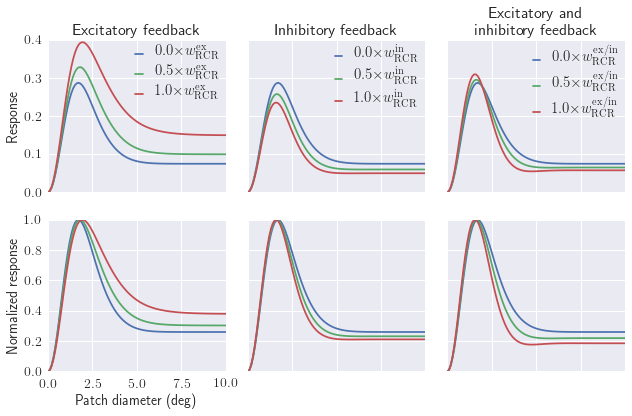

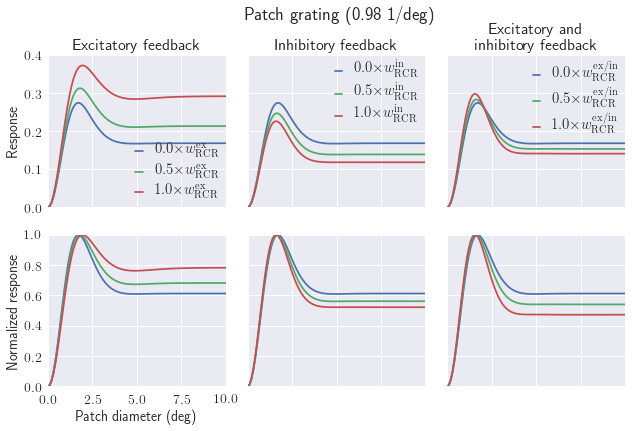

In [9]:
titles = ["Excitatory feedback", "Inhibitory feedback", "Excitatory and\ninhibitory feedback"]
labels = [r"$w^\mathrm{ex}_{\mathrm{RCR}}$", r"$w^\mathrm{in}_{\mathrm{RCR}}$", 
          r"$w^\mathrm{ex/in}_{\mathrm{RCR}}$"]

for k in k_id:
    fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(9, 6), sharey="row", sharex="col")
    if k > 0.0:
        wavenumber=network.integrator.spatial_angular_freqs[int(k)]
        fig.text(0.39, 0.97, ("Patch grating ({})").format(round(wavenumber, 2)), fontsize=18)
        
    # Size tuning curves:
    for ax, w_rc, curves, title, label in zip([ax1, ax2, ax3],
                                               [w_rc_ex, w_rc_in, w_rc_mix], 
                                               [size_tuning["fb_ex"][k]["tuning_curve"], 
                                                size_tuning["fb_in"][k]["tuning_curve"], 
                                                size_tuning["fb_mix"][k]["tuning_curve"]],
                                               titles, labels):

        for w, curve in zip(w_rc[::2][:-1], curves[::2][:-1]):
            ax.plot(patch_diameter, curve, '-', label=r"${} \times $".format(round(w, 1))+label)

        ax.set_xlim([0, 10])
        ax.set_ylim([0, 0.4])
        ax.legend(fontsize=15, handlelength=0.5, labelspacing=0.4, borderpad=0.0)
        ax.set_title(title)


    ax1.set_ylabel("Response")
    ax2.set_xticklabels([])
    ax3.set_xticklabels([])


    # Normalized tuning curves:
    for ax, w_rc, curves, title, label in zip([ax4, ax5, ax6],
                                               [w_rc_ex, w_rc_in, w_rc_mix], 
                                               [size_tuning["fb_ex"][k]["tuning_curve"], 
                                                size_tuning["fb_in"][k]["tuning_curve"], 
                                                size_tuning["fb_mix"][k]["tuning_curve"]],
                                               titles, labels):

        for w, curve in zip(w_rc[::2][:-1], curves[::2][:-1]):
            norm_curve = (curve - curve.min()) / (curve - curve.min()).max()
            ax.plot(patch_diameter, norm_curve, '-', label=r"${} \times$".format(round(w, 1))+label)

        ax.set_xlim([0, 10])
        ax.set_ylim([0, 1.0])

    ax4.set_ylabel("Normalized response")
    ax4.set_xlabel("Patch diameter (deg)")
    fig.tight_layout()

### Optimal size and Suppression index

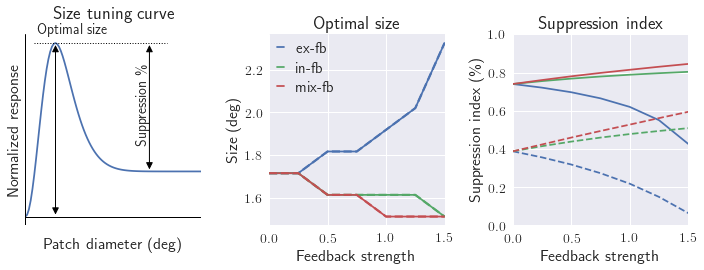

In [7]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10, 4))

# optimal size
ax2.plot(w_rc_ex, size_tuning["fb_ex"][0.0]["cen_size"], 'C0-', label="ex-fb")
ax2.plot(w_rc_in, size_tuning["fb_in"][0.0]["cen_size"], 'C1-', label="in-fb")
ax2.plot(w_rc_mix, size_tuning["fb_mix"][0.0]["cen_size"], 'C2-', label="mix-fb")
ax2.plot(w_rc_ex, size_tuning["fb_ex"][2.0]["cen_size"], 'C0--', lw=2.2)
ax2.plot(w_rc_in, size_tuning["fb_in"][2.0]["cen_size"], 'C1--', lw=2.2)
ax2.plot(w_rc_mix, size_tuning["fb_mix"][2.0]["cen_size"], 'C2--', lw=2.2)

ax2.legend(fontsize=15, handlelength=0.5, labelspacing=0.4, borderpad=0.0)
ax2.set_title("Optimal size", fontsize=18)
ax2.set_ylabel("Size (deg)", fontsize=16)
ax2.set_xlabel("Feedback strength", fontsize=16)
ax2.set_xlim([0, 1.5])

# suppression index
ax3.plot(w_rc_ex, size_tuning["fb_ex"][0.0]["supp_index"], 'C0-', label="ex-fb")
ax3.plot(w_rc_in, size_tuning["fb_in"][0.0]["supp_index"], 'C1-', label="in-fb")
ax3.plot(w_rc_mix, size_tuning["fb_mix"][0.0]["supp_index"], 'C2-', label="mix-fb")
ax3.plot(w_rc_ex, size_tuning["fb_ex"][2.0]["supp_index"], 'C0--')
ax3.plot(w_rc_in, size_tuning["fb_in"][2.0]["supp_index"], 'C1--')
ax3.plot(w_rc_mix, size_tuning["fb_mix"][2.0]["supp_index"], 'C2--')

ax3.set_title("Suppression index", fontsize=18)
ax3.set_ylabel(r"Suppression index (\%)", fontsize=16)
ax3.set_xlabel("Feedback strength", fontsize=16)

ax3.set_xlim([0, 1.5])
ax3.set_ylim([0, 1])



# illustrative figure
curve = size_tuning["fb_ex"][0.0]["tuning_curve"][0,:]
norm_curve = (curve - curve.min()) / (curve - curve.min()).max()

ax1.plot(patch_diameter, norm_curve)
ax1.set_xlim([0, 10])
ax1.set_ylabel("Normalized response", fontsize=16)
ax1.set_xlabel("Patch diameter (deg)", labelpad=20, fontsize=16)
ax1.set_title("Size tuning curve", y=1.05, fontsize=18)

ax1.spines['left'].set_position(('data', 0))
ax1.spines['right'].set_color('none')
ax1.spines['top'].set_color('none')
ax1.spines['bottom'].set_position(('data', 0))

ax1.xaxis.set_ticks_position('none')
ax1.yaxis.set_ticks_position('none')

ax1.set_yticks([])
ax1.set_xticks([])

ax1.grid(False)

ax1.set_facecolor("w")
ax1.axhline(y=0, color='k', linewidth=1.)
ax1.axvline(x=0, color='k', linewidth=1.)


max_id = np.where(norm_curve == norm_curve.max())
xmax = patch_diameter[max_id].magnitude
ymax = norm_curve.max()
xsteady = patch_diameter[-30].magnitude
ysteady = norm_curve[-30]

ax1.plot([0.5, patch_diameter[-20]], [ymax, ymax], color='k', linewidth=1, linestyle=":")

ax1.annotate("Optimal size", xy=(xmax-1., ymax+ymax*0.05), xycoords='data', xytext=(-1, +1), textcoords='offset points')
ax1.annotate("", xy=(xmax, 0), xycoords='data', xytext=(xmax, ymax), textcoords='data',
             arrowprops={'arrowstyle': '<|-|>', 'linestyle': '-', 'linewidth': 1, 'color': 'k'})

ax1.annotate("Suppression \%", xy=(xsteady-0.7, (ymax-ysteady)*1.1), xycoords='data', xytext=(-1, +1), textcoords='offset points', rotation=90)
ax1.annotate("", xy=(xsteady, ysteady), xycoords='data', xytext=(xsteady, ymax), textcoords='data',
             arrowprops={'arrowstyle': '<|-|>', 'linestyle': '-', 'linewidth': 1, 'color': 'k'})

fig.tight_layout()